## EDA & State-wise Complaints Visualization

- **Author**: TextMining Team 1

- **Date of Creation**: November 30, 2023

- **Python Vresion**: 3.8.18

- **Main Functions**:  
  - Conducts an Exploratory Data Analysis (EDA) on the customer complaint data.
  - Generates an interactive map highlighting state characteristics.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import warnings
warnings.filterwarnings("ignore") # ignore warning

### Read Complaints File

In [2]:
# read complaints data
file_path = '../Data/'

df_origin = pd.read_csv(f'{file_path}complaints.csv') # read csv file
print(df_origin.shape)
df_origin.head()

(27536, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/15/18,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"Dear Agent of the CFPB, or to whom it may conc...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MO,631XX,NaN,Consent provided,Web,10/15/18,Closed with explanation,Yes,NaN,3046643
1,05/03/18,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,My home was foreclosed on XX/XX/XXXX without m...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CT,06457,NaN,Consent provided,Web,05/03/18,Closed with explanation,Yes,NaN,2894334
2,10/15/18,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I am writing this letter to file a complaint a...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33027,Servicemember,Consent provided,Web,10/15/18,Closed with monetary relief,Yes,NaN,3046798
3,07/13/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,Ive been fighting with Bank of America for ove...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,XXXXX,NaN,Consent provided,Web,07/13/23,Closed with monetary relief,Yes,NaN,7247589
4,04/16/18,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,I have a business checking account at Bank 0f ...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07076,NaN,Consent provided,Web,04/16/18,Closed with monetary relief,Yes,NaN,2876698


### Column Selection & Create Label Column

In [3]:
# select needed columns
df = df_origin[['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'State']]

# change name of the columns
df.rename(columns={'Date received':'Date',
                   'Consumer complaint narrative':'Complaint'}, inplace=True)

# change Date column to date type
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# create 'Label' columns that is a superclass of product
category_map = { # create a parent category mapping dictionary
    'Mortgage': 'Loan', 
    'Vehicle loan or lease': 'Loan', 
    'Payday loan, title loan, or personal loan': 'Loan', 
    'Student loan': 'Loan', 
    'Payday loan, title loan, personal loan, or advance loan': 'Loan',
    'Credit card or prepaid card': 'Card&Account', 
    'Credit card': 'Card&Account', 
    'Prepaid card': 'Card&Account', 
    'Checking or savings account': 'Card&Account', 
    'Money transfer, virtual currency, or money service': 'Card&Account',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit_Management', 
    'Credit reporting or other personal consumer reports': 'Credit_Management', 
    'Debt or credit management': 'Credit_Management', 
    'Debt collection': 'Credit_Management'
}

# map values from the 'Product' column to the 'Label' column
df['Label'] = df['Product'].map(category_map)

In [5]:
# exporting data
df.to_csv(f'{file_path}complaints_add_label.csv', index=False)

In [6]:
print("---------------------------------------------------------------------------------------")
print(f"Number of complaints per product: \n{df.groupby('Product').size()}")
print("---------------------------------------------------------------------------------------")
print(f"Number of complaints per Label: \n{df.groupby('Label').size()}")
print("---------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------
Number of complaints per product: 
Product
Checking or savings account                                                     10167
Credit card                                                                       158
Credit card or prepaid card                                                      7533
Credit reporting or other personal consumer reports                               151
Credit reporting, credit repair services, or other personal consumer reports     3468
Debt collection                                                                  1285
Debt or credit management                                                           2
Money transfer, virtual currency, or money service                               2065
Mortgage                                                                         2201
Payday loan, title loan, or personal loan                                         118
Payday lo

### EDA 1) Basic statistical information (e.g., number of missing values, data types, etc.)

In [7]:
# basic statistics and data types
basic_stats = df.describe(include='all')
df_types = df.dtypes

# checking for missing values
missing_values = df.isnull().sum()

# unique values in each column
unique_values = df.nunique()

print("----------------------")
print(f"unique values: \n{unique_values}")
print("----------------------")
print(f"missing values: \n{missing_values}")
print("----------------------")
basic_stats.iloc[:3] # extract only the information that is meaningful

----------------------
unique values: 
Date            2116
Product           14
Sub-product       48
Issue             75
Sub-issue        169
Complaint      27213
State             56
Label              3
dtype: int64
----------------------
missing values: 
Date              0
Product           0
Sub-product       5
Issue             0
Sub-issue      4797
Complaint         0
State           201
Label             0
dtype: int64
----------------------


,Date,Product,Sub-product,Issue,Sub-issue,Complaint,State,Label
count,27536,27536,27531,27536,22739,27536,27335,27536
unique,NaN,14,48,75,169,27213,56,3
top,NaN,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,The existence of a derogatory rating on my acc...,CA,Card&Account


### EDA 2) Analyze complaint trends over time

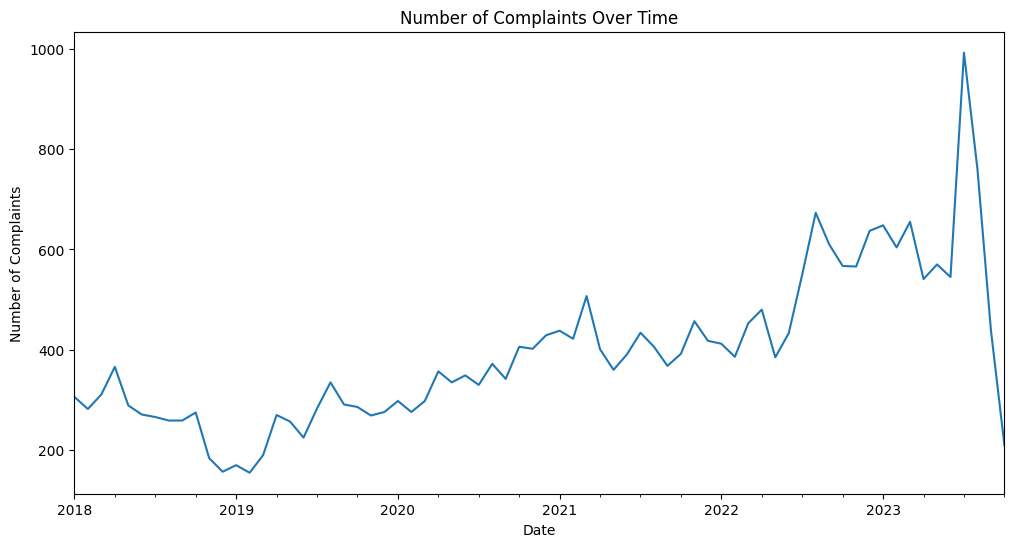

In [8]:
# complaints over time
complaints_over_time = df.groupby(df['Date'].dt.to_period('M')).size()

# plot for number of complaints over time
plt.figure(figsize=(12, 6))
complaints_over_time.plot(kind='line')
plt.title('Number of Complaints Over Time')
plt.ylabel('Number of Complaints')
plt.xlabel('Date')
plt.show()


### EDA 3) Top 5 most complained about products

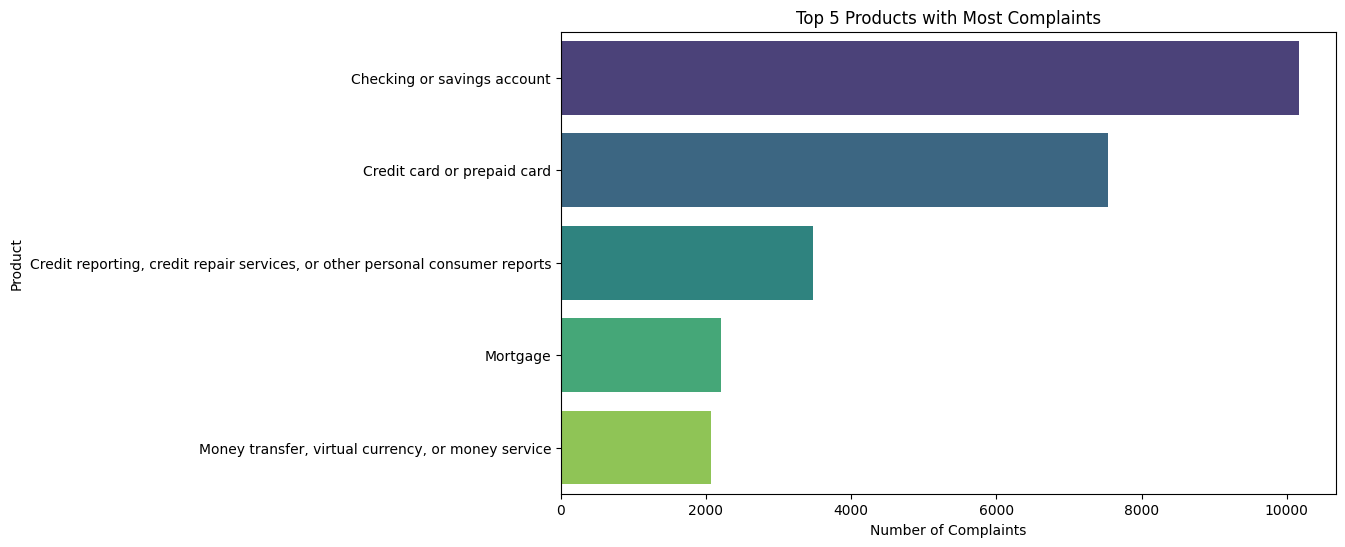

In [9]:
# top 5 most frequent products
top_products = df['Product'].value_counts().head(5)

# plot for top 5 products with most complaints
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis', orient='h')
plt.title('Top 5 Products with Most Complaints')
plt.xlabel('Number of Complaints')
plt.show()


### EDA 4) Top 5 most complained about issues

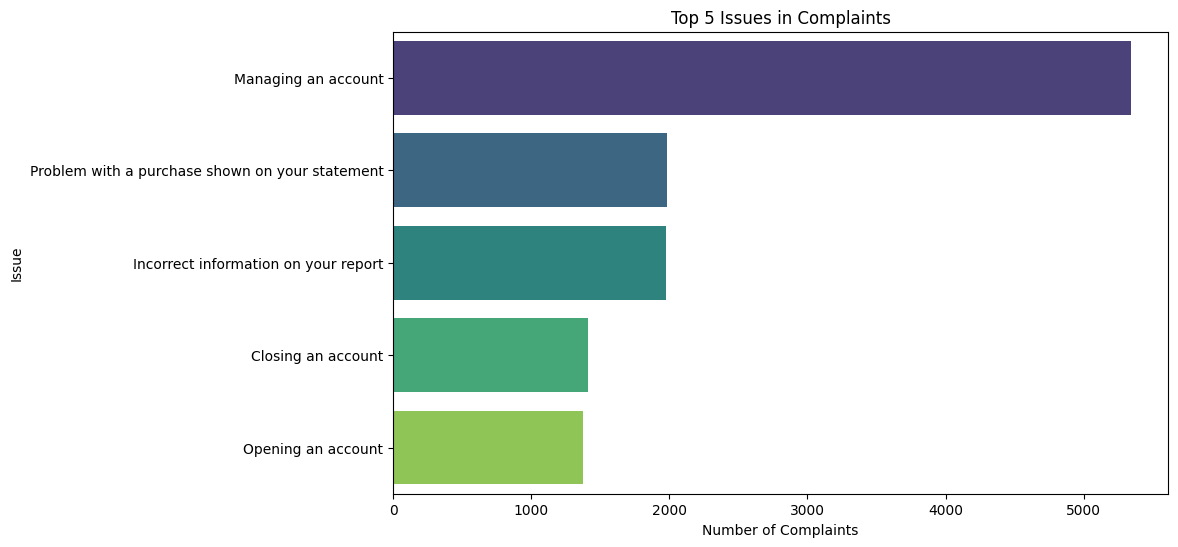

In [10]:
# top 5 most frequent issues
top_issues = df['Issue'].value_counts().head(5)

# plot for top 5 issues in complaints
plt.figure(figsize=(10, 6))
sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis', orient='h')
plt.title('Top 5 Issues in Complaints')
plt.xlabel('Number of Complaints')
plt.show()


### EDA 5) Top 5 states with most complaints

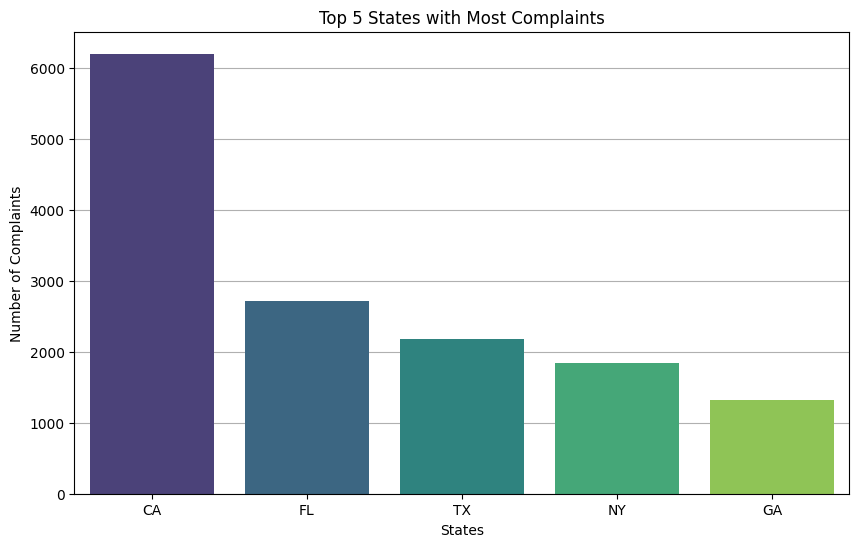

In [11]:
# top 5 states with most complaints
top_states = df['State'].value_counts().head(5)

# plot for top 5 states with most complaints
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis', zorder=2)
plt.title('Top 5 States with Most Complaints')
plt.xlabel('States')
plt.ylabel('Number of Complaints')
plt.grid(axis='y', zorder=1)
plt.show()


### Visualization by States

In [12]:
# create number of complaints by each states
state_complaints = df['State'].value_counts().reset_index()
state_complaints.columns = ['State', 'Complaints']
state_complaints.sort_values('Complaints', ascending=False).head(5)

,State,Complaints
0,CA,6201
1,FL,2723
2,TX,2182
3,NY,1840
4,GA,1322


In [13]:
# state_geo is the path to the GeoJSON file.
state_geo = f'{file_path}us-states.json'

threshold_scale = list(range(0, 6300, 30)) # Range colors based on Complaints value

# Create a folium map object.
m = folium.Map(location=[40, -98], zoom_start=4)

# Create and add a Choropleth layer to the map.
choropleth = folium.Choropleth(
    geo_data=state_geo,  # Data containing boundary coordinates
    data=state_complaints,  # DataFrame
    columns=['State', 'Complaints'],  # Which columns of the DataFrame to use
    key_on='feature.id',  # Fetch the id value; feature.id: must include 'feature' (folium's format)
    fill_color='YlOrRd',  # Fill color
    fill_opacity=0.5,  # Color opacity
    line_opacity=0.1,  # Line opacity
    threshold_scale=threshold_scale,
    legend_name='Complaints Count'  # Legend title
).add_to(m)

# Load GeoJSON data.
with open(state_geo) as f:
    geojson_data = json.load(f)

# Prepare text for tooltips, displaying each state's name and number of complaints.
for feature in geojson_data['features']:
    feature['properties']['tooltip'] = f"{feature['properties']['name']} Complaints: {state_complaints[state_complaints['State'] == feature['id']]['Complaints'].values[0]}"

# Create and add a GeoJson layer with tooltips to the map.
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'color': 'black',  # Set line color to black
        'weight': 1,  # Set line thickness to 1
        'fillOpacity': -10,  # Set fill opacity
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['tooltip'],
        aliases=[' '],
        localize=True
    )
).add_to(m)

# Display the map.
m


In [14]:
# state file
df_state = pd.read_csv(f'{file_path}total_State_sum.csv') # read csv file
df_state.sort_values('pro').head()

,State,value,count,pro
44,SD,-50,3,-16.666667
13,HI,-293,19,-15.421053
53,WY,-30,2,-15.000000
1,AK,-157,14,-11.214286
42,RI,-260,24,-10.833333


In [15]:
# sort descending by pro
df_state.sort_values('pro', ascending=False).head()

,State,value,count,pro
30,ND,2,1,2.000000
20,LA,-12,15,-0.800000
3,AP,-2,2,-1.000000
4,AR,-56,31,-1.806452
28,MT,-19,6,-3.166667


In [16]:
# state_geo is the path to the GeoJSON file.
state_geo = f'{file_path}us-states.json'

threshold_scale = list(range(-17, 3, 1)) # Range colors based on pro value

# Create a folium map object.
m = folium.Map(location=[40, -98], zoom_start=4)

# Create and add a Choropleth layer to the map.
choropleth = folium.Choropleth(
    geo_data=state_geo,
    data=df_state,
    columns=['State', 'pro'],
    key_on='feature.id',
    fill_color='RdYlGn',
    fill_opacity=0.5,
    line_opacity=0.1,
    threshold_scale=threshold_scale,
    legend_name='Pro Value'  # Update legend title
).add_to(m)

# Load GeoJSON data.
with open(state_geo) as f:
    geojson_data = json.load(f)

# Prepare tooltip text (updated to show 'pro' values)
for feature in geojson_data['features']:
    state_id = feature['id']
    pro_value = df_state[df_state['State'] == state_id]['pro'].values[0] if state_id in df_state['State'].values else 'No data'
    feature['properties']['tooltip'] = f"{feature['properties']['name']} Pro: {pro_value}"

# Create and add a GeoJson layer with tooltips to the map.
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'color': 'black',
        'weight': 1,
        'fillOpacity': -10
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['tooltip'],
        aliases=[' '],
        localize=True
    )
).add_to(m)

# Display the map.
m
